# Section 5.5. Sudden change of head at $x=0$, 1D flow in a semi-infinite aquifer. Animations

IHE, Delft, 2017 - 2021

@T.N.Olsthoorn

github@tolsthoorn

<div>
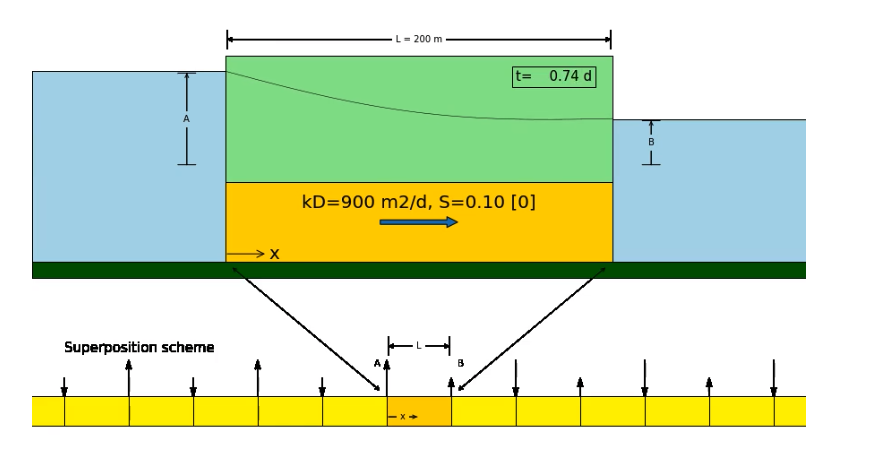
</div>

## Setting and analytical solution

The aquifer is has semi-infinite extent, i.e. $0 \le x \le \infty$. It is considered of constant transmissivity $kD$ and constnat storage coefficient $S$.

The partial differential equation that is governing the flow reads

$$ kD \frac {\partial^2 s} {\partial x} = S \frac {\partial s} {\partial t}  $$


The analytical transient solution for change of head caused by a sudden, forced, change of hat at $x=0$ and $t=0$ is equal to $A [m]$, is

$$ s(x, t) = A \,\mbox{erfc}(u), \,\,\,\, u=\sqrt{\frac {x^2 S} {4 kD t}} $$

Where $\mbox{erfc} () $ is the so-called complementary error function:

$$ \mbox{erfc} (z) = \frac 2 {\sqrt {\pi} } \intop _z ^\infty e ^{-y^2}dy $$

And so its derivative is

$$ \frac {d \mbox{erfc}(z)} {d z} = - \frac 2 {\sqrt {\pi}} e ^{-z^2} $$

Therefore, the discharge equals

$$ Q = -kD \frac {\partial s} {\partial x} = A \sqrt{\frac {kDS} {\pi t}} \exp \left( -\frac {x^2 S} {4 kD t} \right) $$

and for $ x = 0 $

$$ Q_0 = A \sqrt{\frac {kD S} {\pi t}}$$

# Importing modules and define convenience functions

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML
from collections import Counter
from matplotlib.patches import Path, PathPatch
from matplotlib.lines import Line2D
import os
import pdb

cwd = lambda : os.getcwd()

def newfig(title='?', xlabel='?', ylabel='?', xlim=None, ylim=None,
                   xscale='linear', yscale='linear', size_inches=(14, 8), fontsize=15):
    '''Setup a new axis for plotting'''
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(ylim)
    ax.grid(True)
    return ax

attribs = lambda obj: [o for o in dir(obj) if not o.startswith('_')]

bbox = dict(boxstyle="round", color="0.8")

colors = ['brgkmc']

# Animation of head and discharage as a function of $x$ for different times

<div>
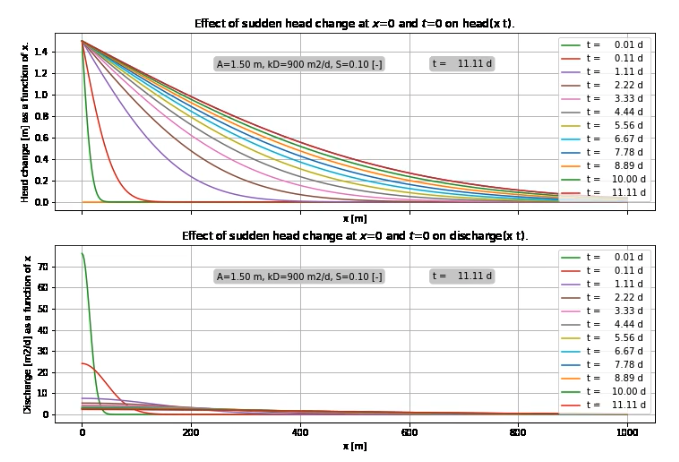
</div>

In [43]:
# aquifer properties
kD = 900 # m2/d
S = 0.1 # [-]

counter = Counter()

T200 = 200 ** 2 * S / (4 * kD) # Characteristic time for x=200

A = 1.5 # m amount of sudden rise of head at x=0 and t=0

x = np.linspace(0, 1000, 501) # coordinates at which to compute the head change and discharge
times0 = np.hstack((np.array([0.01, 0.1]), np.arange(11))) * T200 # times at which to show the had and discharges as a function of x
times1 = np.linspace(0, 10, 100) * T200
times1 = np.unique(np.hstack((times0, times1)))[1:] # now includes exact times0 values


# Define figure and axis for head changes and discharge changes
fig, axs = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(12, 8)
axs[0].set_title("Effect of sudden head change at $x$=0 and $t$=0 on head(x t).")
axs[1].set_title("Effect of sudden head change at $x$=0 and $t$=0 on discharge(x t).")
axs[0].set_xlabel('x [m]')
axs[1].set_xlabel('x [m]')
axs[0].set_ylabel("Head change [m] as a function of x.")
axs[1].set_ylabel("Discharge [m2/d] as a function of x")
axs[0].grid()
axs[1].grid()
artists = [] # Assumed global

# Counter object cout for each key if key is used in its call
cnt = Counter()
cnt['it'] = 0

def plot_all(t, update=False):
    """Plot head and discharge for a single given time and return artists.
    
    Parameters
    ----------
    t: float
        current time
    update: bool
        whether or not to update the path/contour of patches and or lines.
        Only if not update then generate a new line, else just set the data.
        
    implicitly global parameters used: A, S kD, x, artists
    
    """
    global artists, cnt
    
    k = 0 # Counter
    u = 1e6 * np.ones_like(x) if t <= 0 else np.sqrt((x**2 * S)/(4 * kD * t))
    s = A * erfc(u)
    Q = np.nan * x if t<=0 else A * np.sqrt((kD * S)/(np.pi * t)) * np.exp(-u**2)

    if not update:
        # Generate a completely new line, so that the old ones remains visible and is no longer updated
        # The first time update must be False, or else line is assumed to exist which is then not the case.
        line, = axs[0].plot(x, s)
        artists.append(line)
        k += 1
        artists.append(axs[1].plot(x, Q)[0])
        k +=1
    else:
        # Just reset the data for artist k
        artists[k].set_data(x, s) # head data
        k += 1
        artists[k].set_data(x, Q) # the discharge
        k += 1
        if t in times0:
            cnt['it'] += 1
            clr = colors[cnt['it'] % len(colors)]
            axs[0].plot(x, s, label=f't = {t:8.2f} d')
            axs[1].plot(x, Q, label=f't = {t:8.2f} d')
            axs[0].legend(loc="upper right")
            axs[1].legend(loc="upper right")
    if not update:
        # Generate a new text object
        #axs[0].legend(loc="upper right")
        #axs[1].legend(loc="upper right")
        txt = axs[0].text(0.63, 0.81, "t = {:8.2f} d".format(t), transform=axs[0].transAxes, bbox=bbox)
        artists.append(txt)        
        txt = axs[1].text(0.63, 0.81, "t = {:8.2f} d".format(t), transform=axs[1].transAxes, bbox=bbox)
        artists.append(txt)
    else:
        # Only update the current already existing text object's text
        artists[-2].set_text("t = {:8.2f} d".format(t))
        artists[-1].set_text("t = {:8.2f} d".format(t))
    return artists


# Animation
def init():
    return plot_all(0, update=False)

def animate(t):
    return plot_all(t, update=True)

axs[0].text(0.27, 0.81, f"A={A:.2f} m, kD={kD:.0f} m2/d, S={S:.2f} [-]", transform=axs[0].transAxes, bbox=bbox)
axs[1].text(0.27, 0.81, f"A={A:.2f} m, kD={kD:.0f} m2/d, S={S:.2f} [-]", transform=axs[1].transAxes, bbox=bbox)

if True:
    anim = FuncAnimation(fig, animate, init_func=init,
                                       frames=times1, 
                                       fargs=None,
                                       interval=50, blit=True, repeat=False)
    print('Done!')

    plt.close(anim._fig)
    out = HTML(anim.to_html5_video())
    display(out)
else:    
    fname = "SuddenHeadChange1D"

    anim.save(fname + '.mp4', fps=10, extra_args=['-vcodec', 'libx264'], bitrate=1000)
    print(anim.save_count, " frames saved.")

    !ffmpeg -i SuddenHeadChange1D.mp4 -y SuddenHeadChange1D.gif

Done!


# Functions to show annoations and place the animated plot on the correct location of the figure

In [44]:
def ann_dim(x1=None, y1=None, x2=None, y2=None, text="text",
                    astyle0='|-|', astyle1='<->', rotation=0, fc='white', ax=None):
    """Annotate a length with a dimension arrow placing the value in the center.
    
    Like so  |<----- 25 ------>|
    
    Parameters
    ----------
    x0, y0, x1, y1: 4 floats
        start and end point
    text: str
        the text to use
    astyle0, astyle1 both str
            one of '-', <->', '<-', '->', '<|-', '-|>'
    rotation: float
        text roation in degrees
    fc: str
        face color of background of text label
    ax: Axes obj
        the axes to place the annotation on.
    """
    ax.annotate("", (x1, y1), (x2, y2), textcoords=ax.transData, arrowprops=dict(arrowstyle=astyle0))
    ax.annotate("", (x1, y1), (x2, y2), textcoords=ax.transData, arrowprops=dict(arrowstyle=astyle1))
    ax.text((x1 + x2) / 2, (y1 + y2) / 2, text, ha="center", va="center", bbox=dict(fc=fc, ec='none'))


def ax2fig(x0=None, y0=None, w=None, h=None, ax=None):
    """Convert from data coordinates in ax to figure coordinates.
    
    This is to place a rectangle in an axis on the same place on the screen in screen coordinates
    allowing to place a subaxis in an existing axis eactly right on the schreen.
    
    Parameters
    ----------
    x0, y0, w, h: lower left corner, width and height of rectangle in data/user coordinates
    
    Returns
    -------
    u, v, uw, vh: position in figure coordiates which can be used as position attribute to
            place an axis on the figure.
    
    """
    fig = ax.figure
    verts = np.array([[x0, y0], [x0 + w, y0 + h]])
    uvD = ax.transData.transform(verts)
    uvF = fig.transFigure.inverted().transform(uvD)
    return uvF[0, 0], uvF[0, 1], uvF[1, 0] - uvF[0, 0], uvF[1, 1] - uvF[0, 1]

def boxPath(x0=None, y0=None, w=None, h=None):
    """Return a Box_path.
    
    Parameters
    ----------
    x0, y0, w, h: lower left corner, widht and heigh of the box
    
    Returns
    -------
    corresponding Path.Path object
    """
    return Path(np.array([[0, 0],[w, 0],[w, h],[0, h],[0, 0]]) + np.array([[x0, y0]]),
              codes=[1, 2, 2, 2, 79])

class Box(PathPatch):
    """Class Box as subclass of PathPatch keeping path coords in user values.
    
    This has some convenience ability relative to the original PathPatch.
    
    """
    def __init__(self, x0=None, y0=None, w=None, h=None, **kw):
        path = boxPath(x0=x0, y0=y0, w=w, h=h)
        super().__init__(path, **kw)
                
class Arrow(Line2D):
    """Arrow class derived from a Line2D object.
    
    The Idea is to give some more convenience support.
    """
    def __init__(self, x0, y0, w, h, **kw):
        """Return the coordinaters of an arrow.
        
        Parmeters
        ---------
        x0 y0, w, h: starting point and width and height (length) of the arrow in data coordinates.
        h: float length
            use negative length to reverse the arrow.
        """
        positive = h >= 0
        h = abs(h)
        w = abs(w)
        verts = np.array([[0, 0], [0, h], [-w, h -w], [0, h - 0.75 * w],  [w, h - w], [0, h]])
        codes = np.ones(6); codes[1:] = 2
        if positive:
            self.path = Path(verts + np.array([[x0, y0]]), codes)
        else:
            self.path = Path(np.array([[x0, y0 + h]] - verts), codes)
        xdata, ydata = self.path.vertices.T    
        super().__init__(xdata, ydata, **kw)
        
  
def s_A(t=None, x=None, w=None, A=None, n=20):
    """Return head change due to sudden left water change change of its envelope.
    
    Parameters
    ----------
    t: float
        time
    x: nd.array or float
        x coordinates from left side of land strip.
    w: float
        width of land strip
    A: float
        amount of sudden water level rise
    n: int
        number of block to the right and left in superposition
        use n=0 for no superposition
    """
    u = lambda t, x: np.sqrt(x ** 2 * S / (4 * kD * t))
    
    if t<=0:
        return np.zeros_like(x)
    
    s = A * erfc(u(t, x))
    for i in range(1, n):
        s += A * erfc(u(t, x + 2 * i * w))
        s -= A * erfc(u(t, 2 * i * w - x))
    return s

# Sudden head change at the left

<div>
    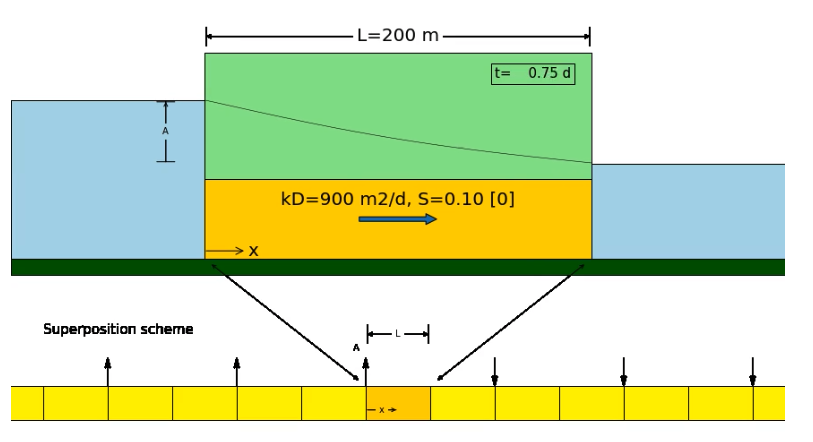
</div>

In [77]:
# Setting up the problem, picture first, animation second
superposition = True

# Parameters
kD, S = 900, 0.10 # Transmissivity [m2/d] and storage coefficient [-]
x0, y0 = 0, 0     # Coordinates of lower left point of aquifer
hb, haq, hac = 5, 25, 40   # thickness of the dark green base, the aquifer and the aquiclude
hLL, hLR, A = 30, 30, 20 # mean stage at left and right and the succen change
w, wL, wR = 200, 100, 100  # width of the land stip and the space to the left and right of it

# lambda macro to easily compute u, using the global values for kD and S
u = lambda t, x: x * np.sqrt(S / (4 * kD * t))
   
# Set up figure with two axes, one for the picture at the top and one for that at the bottom
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(12, 8)

# Axes for top picture with aquifer and animation
axs[0].set_position((0, 0.4,  1, 0.6)) 
axs[0].set_frame_on(False)
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)

# Axes for lower picture with mirror scheme
axs[1].set_position((0, 0.1, 1, 0.2))
axs[1].set_frame_on(False)
axs[1].xaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Set mirris scheme picture xlim to so many times the strip width
axs[1].set_xlim(-5.5 * w, 6.5 * w)
axs[1].set_ylim(-0.5 * haq, 2.5 * haq)

# Initialize list of artists in the simulation
artists = []

# Lower picture with mirror scheme.
# Define the strips of land of the mirror scheme and the arrows
for i in range(-7, 7):
    xi = i * w
    fc = "gold" if i==0 else "yellow"
    
    # Each strip is a Box patch
    Bx = Box(x0=xi, y0=y0, w=w, h=haq, fc=fc)
    axs[1].add_patch(Bx) # put it in its axes
    artists.append(Bx)   # add it to the list of artists

    # Odd and even strips of land in the spatial superposition scheme
    if i % 2 == 0:
        if i <= 0:
            # Dowward arrow
            arrow = Arrow(xi, y0 + haq, w/30,  A, color='black')
        else:
            # Upward arrow
            arrow = Arrow(xi, y0 + haq, w/30, -A, color='black')
        axs[1].add_line(arrow)
        artists.append(arrow)

# Define patches for the picture with aquifer and animation
basis = Box(x0 - wL, y0, wL + w + wR, -hb, fc='darkgreen') # The base of the aquifer system
aquif = Box(x0, y0, w, haq, fc="gold")                     # The aquifer
aclude = Box(x0, y0 + haq, w, hac, fc="lightgreen")        # The aquiclude
lakeL = Box(x0 - wL, y0, wL, hLL, fc="lightblue")          # The water at the left-hand side
lakeR = Box(x0 + w , y0, wR, hLR, fc="lightblue")          # The water ar the right-hand side

# Add them to the axes
for thing in [basis, aquif, aclude, lakeL, lakeR]:
    axs[0].add_patch(thing)

# Set limits for the top picture
axs[0].set_xlim((-wL, w + wR))
axs[0].set_ylim((-1.5 * hb, haq + hac + 25))


# Set the dimension arrow showing the amplitude of the head change
ht = haq + hac + hb
ann_dim(x1=-wL/5, y1=hLL, x2=-wL/5, y2=hLL + A, text="A",
                    astyle0='|-|', astyle1='<-', rotation=0, fc='lightblue', ax=axs[0])


if superposition:  # So we need to show the mirror scheme
    # Double arrow from [0,0] in axs[0] to [0, haq] in axs[1]
    axs[0].annotate("", xy=(0, 0), xytext=(0, haq), textcoords=axs[1].transData,
                    arrowprops=dict(arrowstyle='<->', shrinkA=10, shrinkB=10))
    # Double arrow from [w, 0] in axs[0] to [w, haq] in axs[1] 
    axs[0].annotate("", xy=(w, 0), xytext=(w, haq), textcoords=axs[1].transData,
                    arrowprops=dict(arrowstyle='<->', shrinkA=10, shrinkB=10))

    
# Place the values of the transmissivity and storage cofficient in the top axes
axs[0].text(w/2, 0.75 * haq, "kD={:.0f} m2/d, S={:.2f} [0]".format(kD, S), ha="center", va="center", fontsize=20)

# Place an arrow with "x" showing the x axis and its direction in the top figure
axs[0].annotate("x", xy=(0, haq/10), xytext=(w/8, haq/10), textcoords=axs[0].transData,
                arrowprops=dict(arrowstyle='<-'), ha="center", va="center", fontsize=20)

# Place a thick arrow (blue) in the aquifer showing the direction of flow
axs[0].annotate("", xy=(0.6 * w, haq/2), xytext=(0.4 * w, haq/2), textcoords=axs[0].transData,
                arrowprops=dict(width=5), ha="center", va="center")


# Add a new axis to the figure, its lower left must be at 0 hLL exactly and width and height
ax = fig.add_axes(ax2fig(0, hLL, w, A, ax=axs[0]), xlim=(0, w), ylim=(-0.2, A))
ax.set_fc("none")            # Make the new axes transparent
ax.xaxis.set_visible(False)  # hide its x axis
ax.yaxis.set_visible(False)  # hide its y axis
ax.set_frame_on(False)       # No outer frame

# x coordinates for the animation
x = np.linspace(0, 200, 201)

T = 500 * np.sqrt(S /(4 * kD))
n = 8
times = np.hstack((np.array([0.01, 0.1]) * T, np.linspace(0, T, n)[1:]))

# Place a dimension arrow in the mirror axs[1] to indicate the width of the strip
ann_dim(0, 2.5 * haq, w, 2.5 * haq, text="L", fc='w', ax=axs[1])

# Place an arrow indicating the x-axis in the mirror axs[1]
ann_dim(0, 0.3 * haq, 0.5 * w, 0.3 * haq, text="x", astyle0='-', astyle1='<-', fc='gold', ax=axs[1])

# Add the "A" indicating the head change
axs[1].text(-0.2 * w, 2 * haq, "A")

# Add the text "superposition scheme" to axs[1]
axs[1].text(-5 * w, 2.5 * haq, "Superposition scheme", fontsize=15)

# Define the simulation/animation times
T = 50 * np.sqrt(S / (4 * kD))
times = np.linspace(-1, 6, 121) * T

if superposition:
    n = 20 # Num er of iterations in the summation / superposition
    axs[1].set_visible(True) # Just show axs[1] if superposition
else:
    n = 0  # No iterations
    axs[1].set_visible(False) # Don't show axs[1] with the mirror scheme
    # Inform user that no superposition is used
    axs[0].annotate("No superposition!\n(No mirror strips)!", xy=(w, haq + 7), 
                    xytext=(w + 0.5 * wR, haq + 0.5 * hac), ha="center", va="center",
                    textcoords=axs[0].transData, fontsize=15, arrowprops=dict(arrowstyle="->"))

# Animation
t=0
line, = ax.plot(x, s_A(t=t, x=x, w=w, A=A, n=0), 'k', lw=0.5)
txt = axs[0].text(150, haq + 0.8 * hac, "t= {:7.2f} d".format(t), fontsize=15, bbox=dict(fc="lightgreen"))

def init():
    # Initialize the artists we need with initial values
    line.set_data([],[])
    txt.set_text("")
    return txt, line, lakeL
    
def animate(t, x, wL, A):
    # Aninate for each t
    DH = 0. if t <=0 else A # Stage stays at hLL as long as t<=0, for t>0 it's A
    h=hLL + DH              # Stage
    txt.set_text("t= {:7.2f} d".format(t)) # Tell simulation time
    line.set_data(x, s_A(t=t, x=x, w=w, A=DH, n=n))  # Update the line
    lakeL.set_path(boxPath(x0=-wL, y0=0, w=wL, h=h)) # Update thte left lake level
    return txt, line, lakeL

# Animate
anim = FuncAnimation(fig, animate, init_func=init,
                                   frames=times, 
                                   fargs=(x, wL, A),
                                   interval=100, blit=True, repeat=False)

if True: # Only show the animation on screen
    plt.close(anim._fig)
    out = HTML(anim.to_html5_video())
    print('Done!')
    display(out)
else: # Save the animation as an .mp4 file and than  generate an ever self repeating .gif file
    if superposition:
        file1 = "SuddenHeadChangeA.mp4"
        file2 = "SuddenHeadChangeA.gif"
    else:
        file1 = "SuddenHeadChangeNoSuperposition.mp4"
        file2 = "SuddenHeadChangeNoSuperposition.gif"
    anim.save(file1, fps=15, extra_args=['-vcodec', 'libx264'], bitrate=1000)
    print(anim.save_count, " frames saved.")

    !ffmpeg -i $file1 -y $file2
    os.getcwd()

Done!


# Second case with a strip of length w with boundary conditions on both sides

<div>
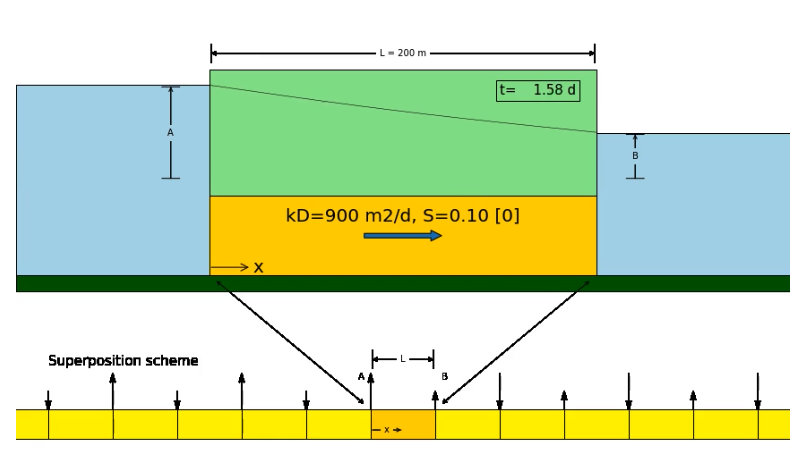
</div>

In [87]:
def s_AB(t=None, x=None, w=None, A=None, B=None, n=20):
    """Return head change due to sudden left water change change computed by superposition.
    
    Parameters
    ----------
    t: float
        time
    x: nd.array or float
        x coordinates from left side of land strip.
    w: float
        width of land strip
    A: float
        amount of sudden water level rise at the left
    B: float
        amount of sudden water level rise at the right
    n: int
        number of block to the right and left in superposition
        use n=0 for no superposition
    """
    if t<=0:
        return np.zeros_like(x)
    s = A * erfc(u(t, x))
    for i in range(1, n):
        s += A * erfc(u(t, x + 2 * i * w))
        s -= A * erfc(u(t, 2 * i * w - x))
        s -= B * erfc(u(t, x + (2 * i - 1) * w))
        s += B * erfc(u(t, (2 * i - 1) * w - x))
    return s


ax1visible    = True # show the superpositon scheme
superposition = True

# Parameters
kD, S = 900, 0.1
x0, y0 = 0, 0
hb, haq, hac =  5, 25, 40
hLL , hLR, A, B = 30, 30, 30, 15
w, wL, wR = 200, 100, 100 

# Top of the aquifer ystem (essentially ground surface)
ht = haq + hac + hb

# x values for animation
x = np.linspace(0, w, int(w) + 1) # every meter

# Macro to compute u
u = lambda t, x: x * np.sqrt(S / (4 * kD * t))

# Get the two axis (X section) and mirror scheme
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(12, 8)
axs[0].set_position((0, 0.4,  1, 0.6))
axs[0].set_frame_on(False)
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[0].set_xlim((-wL, w + wR))
axs[0].set_ylim((-1.5 * hb, haq + hac + 25))

# Second axis for mirror scheme picture
axs[1].set_position((0, 0.1, 1, 0.2))
axs[1].set_frame_on(False)
axs[1].xaxis.set_visible(False)
axs[1].yaxis.set_visible(False)
axs[1].set_xlim(-5.5 * w, 6.5 * w)    # accomodate width of several strips
axs[1].set_ylim(-0.5 * haq, 3 * haq) 

# Initialize the animation artists
artists=[]

# Patches for the strips of land shown in the mirror scheme axs[1]
for i in range(-7, 7):
    xi = i * w
    fc = "gold" if i==0 else "yellow"
    Bx = Box(x0=xi, y0=y0, w=w, h=haq, fc=fc)
    axs[1].add_patch(Bx)
    artists.append(Bx)
    if i % 2 == 0:
        if i <= 0:
            arrow = Arrow(xi, y0 + haq, w/30, A, color='black')
        else:
            arrow = Arrow(xi, y0 + haq, w/30, -A, color='black')
        axs[1].add_line(arrow)
    else:
        if i <= 0:
            arrow = Arrow(xi, y0 + haq, w/30, -B, color='black')
        else:
            arrow = Arrow(xi, y0 + haq, w/30, B, color='black')
        axs[1].add_line(arrow)
    artists.append(arrow)

# Define patches for the different part of the cross section
basis  = Box(x0 - wL, y0, wL + w + wR, -hb, fc='darkgreen')
aquif  = Box(x0,      y0, w,            haq, fc="gold")
aclude = Box(x0,      y0 +haq, w,       hac, fc="lightgreen")
lakeL  = Box(x0 - wL, y0, wL,           hLL, fc="lightblue")
lakeR  = Box(x0 + w , y0, wR,           hLR, fc="lightblue")

# Put them on the top axes
for thing in [basis, aquif, aclude, lakeL, lakeR]:
    axs[0].add_patch(thing)


# Dimension arrow for left head change
ann_dim(x1=-wL/5, y1=hLL, x2=-wL/5, y2=hLL + A, text="A",
                    astyle0='|-|', astyle1='<-', rotation=0, fc='lightblue', ax=axs[0])
# Dimension arrow for right head change
ann_dim(x1=w + wR/5, y1=hLR, x2=w + wR/5, y2=hLR + B, text="B",
                    astyle0='|-|', astyle1='<-', rotation=0, fc='lightblue', ax=axs[0])
# Dimension arrow just above the strip in the top axes
ann_dim(x1=0, y1=ht, x2=w, y2=ht, text="L = 200 m",
                    astyle0='|-|', astyle1='<->', rotation=0, fc='white', ax=axs[0])

if ax1visible:
    # Arrow from 0, 0 in axs[0] to 0, haq in axs[1]
    axs[0].annotate("", xy=(0, 0), xytext=(0, haq), textcoords=axs[1].transData,
                    arrowprops=dict(arrowstyle='<->', shrinkA=10, shrinkB=10))
    # Arrow from [1, 0] in axs[0] to [w, haq] in axs[1]
    axs[0].annotate("", xy=(w, 0), xytext=(w, haq), textcoords=axs[1].transData,
                    arrowprops=dict(arrowstyle='<->', shrinkA=10, shrinkB=10))

# Add text with kD and S to the top picture
axs[0].text(w/2, 0.75 * haq, "kD={:.0f} m2/d, S={:.2f} [0]".format(kD, S), ha="center", va="center", fontsize=20)
# Add indication of x axis in top picture
axs[0].annotate("x", xy=(0, haq/10), xytext=(w/8, haq/10), textcoords=axs[0].transData,
                arrowprops=dict(arrowstyle='<-'), ha="center", va="center", fontsize=20)
axs[0].annotate("", xy=(0.6 * w, haq/2), xytext=(0.4 * w, haq/2), textcoords=axs[0].transData,
                arrowprops=dict(width=5), ha="center", va="center")

# Add animation axes to figure and place it on the right location and with right size
ax = fig.add_axes(ax2fig(0, hLL, w, A, ax=axs[0]), xlim=(0, w), ylim=(-0.2, A))
ax.set_fc("none")   # make axes transparent
ax.xaxis.set_visible(False)  # Hide x-axis
ax.yaxis.set_visible(False)  # Hide y-axis
ax.set_frame_on(False)       # No frame around it


T = 500 * np.sqrt(S /(4 * kD))
n = 8
times = np.hstack((np.array([0.01, 0.1]) * T, np.linspace(0, T, n)[1:]))

if ax1visible:
    axs[1].set_visible(True)
else:
    axs[1].set_visible(False)

ann_dim(0, 2.7 * haq, w, 2.7 * haq, text="L", fc='w', ax=axs[1])
ann_dim(0, 0.3 * haq, 0.5 * w, 0.3 * haq, text="x", astyle0='-', astyle1='<-', fc='gold', ax=axs[1])
axs[1].text(-0.2 * w, 2 * haq, "A")
axs[1].text(1.1  * w, 2 * haq, "B")

# Add this text to the lower picture
axs[1].text(-5 * w, 2.5 * haq, "Superposition scheme", fontsize=15)

# Animation
T = 50 * np.sqrt(S / (4 * kD))
times = np.linspace(-1, 6, 121) * T # simulation times

# Initialize line and txt artists
t = 0.
line, = ax.plot(x, s_AB(t=t, x=x, w=w, A=A, B=B, n=20), 'k', lw=0.5)
txt = axs[0].text(150, haq + 0.8 * hac, "t= {:7.2f} d".format(t), fontsize=15, bbox=dict(fc="lightgreen"))

def init():
    txt.set_text("t= {:7.2f} d".format(t))
    return txt, line, lakeL, lakeR
    
def animate(t, x, wL, A, B, hLL, hLR):
    DL = 0. if t <=0 else A
    DR = 0. if t <=0 else B
    txt.set_text("t= {:7.2f} d".format(t))
    line.set_data(x, s_AB(t=t, x=x, w=w, A=DL, B=DR, n=20))
    lakeL.set_path(boxPath(x0= -wL, y0=0, w=wL, h=hLL + DL))
    lakeR.set_path(boxPath(x0=   w, y0=0, w=wR, h=hLR + DR))
    return txt, line, lakeL, lakeR

anim = FuncAnimation(fig, animate, init_func=init,
                                   frames=times, 
                                   fargs=(x, wL, A, B, hLL, hLR),
                                   interval=100, blit=True, repeat=False)

showit=True
if showit:
    plt.close(anim._fig)
    out = HTML(anim.to_html5_video())
    print('Done !')
    display(out)
else:
    file1 = "SuddenHeadChangeAB.mp4"
    file2 = "SuddenHeadChangeAB.gif"
    anim.save(file1, fps=15, extra_args=['-vcodec', 'libx264'], bitrate=1000)
    print(anim.save_count, " frames saved.")

    !ffmpeg -i $file1 -y $file2
    os.getcwd()

Done !


 # Sudden lowering at both sides or effect of drainage after a shower
 
 
 ## When `drainage == False`
 
 <div>
    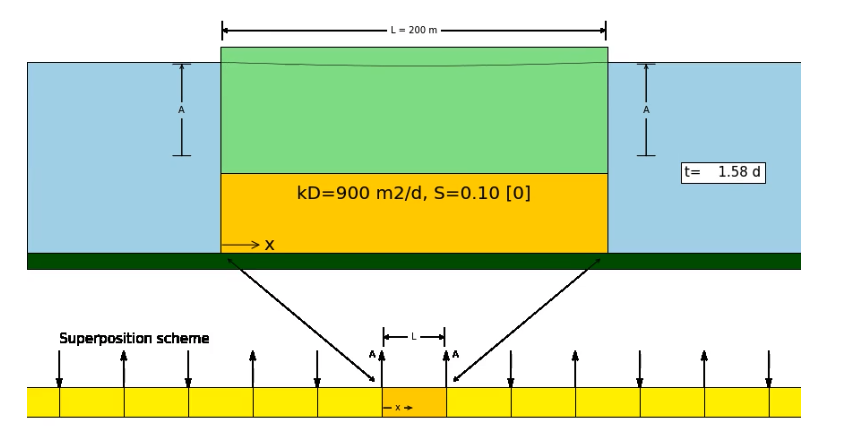
 </div>
 
 ## When `drainage == True`
 
 <div>
     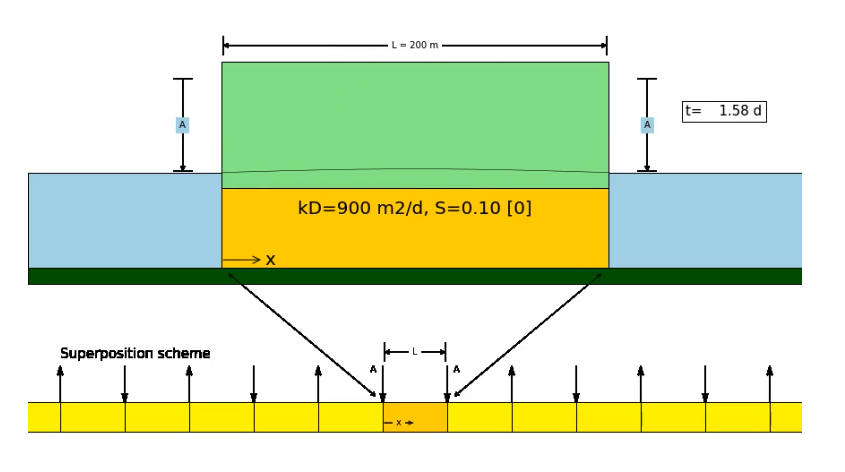
 </div>

In [90]:
# Settings
drainage = True
ax1visible = True
superposition = True

# Parameteres
kD, S = 900, 0.1         # Transmissivity and storage coefficient
x0, y0 = 0, 0            # Lower left coordinate of aquifer
hb, haq, hac = 5, 25, 40 # thickness of base, aquier and aquitard
w, wL, wR = 200, 100, 100 # Strip width and width of lake left and right

# x values for simulation axis
x = np.linspace(0, w, int(w) + 1)

# Macro to compute u using global kD and S
u = lambda t, x: x * np.sqrt(S / (4 * kD * t))

# Ground surface
ht = haq + hac + hb

# Left and right initial or static stage and sudden change of left and right lake stage
if drainage:
    hLL , hLR, A, B = 60, 60, -30, -30
else:
    hLL , hLR, A, B = 30, 30,  30,  30
 
# Set up figure and axes for cross section and mirros scheme
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(12, 8)
axs[0].set_position((0, 0.4,  1, 0.6))
axs[0].set_frame_on(False)
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[0].set_xlim((-wL, w + wR))
axs[0].set_ylim((-1.5 * hb, haq + hac + 25))

# Axes for mirror scheme
axs[1].set_position((0, 0.1, 1, 0.2))
axs[1].set_frame_on(False)
axs[1].xaxis.set_visible(False)
axs[1].yaxis.set_visible(False)
axs[1].set_xlim(-5.5 * w, 6.5 * w)
axs[1].set_ylim(-0.5 * haq, 3 * haq)
if ax1visible:
    axs[1].set_visible(True)
else:
    axs[1].set_visible(False)

# Initialize artists to animate
artists=[]

# Patches to show the mirror scheme in second pi ture
for i in range(-7, 7):
    xi = i * w
    fc = "gold" if i==0 else "yellow"
    Bx = Box(x0=xi, y0=y0, w=w, h=haq, fc=fc)
    axs[1].add_patch(Bx)
    artists.append(Bx)
    if i % 2 == 0:
        if i <= 0:
            arrow = Arrow(xi, y0 + haq, w/30, +A, color='black')
        else:
            arrow = Arrow(xi, y0 + haq, w/30, -A, color='black')
        axs[1].add_line(arrow)
    else:
        if i <= 0:
            arrow = Arrow(xi, y0 + haq, w/30, -B, color='black')
        else:
            arrow = Arrow(xi, y0 + haq, w/30, +B, color='black')
        axs[1].add_line(arrow)
    artists.append(arrow)

# Patches to show the base, aquifer, aquiclude and left and right lake in top axes
basis  = Box(x0 - wL, y0, wL + w + wR, -hb, fc='darkgreen')
aquif  = Box(x0,      y0, w,            haq, fc="gold")
aclude = Box(x0,      y0 +haq, w,       hac, fc="lightgreen")
lakeL  = Box(x0 - wL, y0, wL,           hLL, fc="lightblue")
lakeR  = Box(x0 + w , y0, wR,           hLR, fc="lightblue")

# Add these patches to the top axes
for thing in [basis, aquif, aclude, lakeL, lakeR]:
    axs[0].add_patch(thing)

# Show arrow indicating left head change
ann_dim(x1=-wL/5, y1=hLL, x2=-wL/5, y2=hLL + A, text="A",
                    astyle0='|-|', astyle1='<-', rotation=0, fc='lightblue', ax=axs[0])
# Same for right head change
ann_dim(x1=w + wR/5, y1=hLR, x2=w + wR/5, y2=hLR + B, text="A",
                    astyle0='|-|', astyle1='<-', rotation=0, fc='lightblue', ax=axs[0])
# Dimension arrow just above the strip in the top axes
ann_dim(x1=0, y1=ht, x2=w, y2=ht, text="L = 200 m",
                    astyle0='|-|', astyle1='<->', rotation=0, fc='white', ax=axs[0])

if ax1visible:
    # Arrow from 0, 0 in top axes (axs[0]) to 0, haq in bottom mirror axes (axs[1])
    axs[0].annotate("", xy=(0, 0), xytext=(0, haq), textcoords=axs[1].transData,
                    arrowprops=dict(arrowstyle='<->', shrinkA=10, shrinkB=10))
    # Arrow from w, 0 in top axes (axs[0]) to w, haq in bottom mirror axes (axs[1])
    axs[0].annotate("", xy=(w, 0), xytext=(w, haq), textcoords=axs[1].transData,
                    arrowprops=dict(arrowstyle='<->', shrinkA=10, shrinkB=10))

# Tell user what parameters are used, put it on the aquifer
axs[0].text(w/2, 0.75 * haq, "kD={:.0f} m2/d, S={:.2f} [0]".format(kD, S), ha="center", va="center", fontsize=20)

# Show arrow with x to indicate the start and direction of the x axis in the top figure
axs[0].annotate("x", xy=(0, haq/10), xytext=(w/8, haq/10), textcoords=axs[0].transData,
                arrowprops=dict(arrowstyle='<-'), ha="center", va="center", fontsize=20)

# Add the axis to show the animation. Put it on the right location in the figure
if drainage: # (A < 0)
    # If A<0 put the axes of for the animation upside down (is easiest)
    ax = fig.add_axes(ax2fig(0, hLL + A, w, -A, ax=axs[0]), xlim=(0, w), ylim=(A, 0.2))
else: # A > 0
    ax = fig.add_axes(ax2fig(0, hLL, w, A, ax=axs[0]), xlim=(0, w), ylim=(0.2, A))

ax.set_fc("none")            # Transparent
ax.xaxis.set_visible(False) # Hide x axis
ax.yaxis.set_visible(False) # Hide y axis
ax.set_frame_on(False)      # No frame around axis

T = 500 * np.sqrt(S /(4 * kD))
n = 8
times = np.hstack((np.array([0.01, 0.1]) * T, np.linspace(0, T, n)[1:]))


ann_dim(0, 2.7 * haq, w, 2.7 * haq, text="L", fc='w', ax=axs[1])
ann_dim(0, 0.3 * haq, 0.5 * w, 0.3 * haq, text="x", astyle0='-', astyle1='<-', fc='gold', ax=axs[1])
axs[1].text(-0.2 * w, 2 * haq, "A")
axs[1].text(1.1  * w, 2 * haq, "A")

axs[1].text(-5 * w, 2.5 * haq, "Superposition scheme", fontsize=15)


# Animation

# Simulation times
T = 50 * np.sqrt(S / (4 * kD))
times = np.linspace(-1, 6, 121) * T

# Initialize the line and the time text
t = 0.
line, = ax.plot(x, s_AB(t=t, x=x, w=w, A=A, B=B, n=20), 'k', lw=0.5)
txt = axs[0].text(240, 0.8 * hLR, "t= {:7.2f} d".format(t), fontsize=15, bbox=dict(fc="white"))

def init():
    txt.set_text("t= {:7.2f} d".format(t))
    return txt, line, lakeL, lakeR
    
def animate(t, x, wL, A, B, hLL, hLR):
    DL = 0. if t <=0 else A
    DR = 0. if t <=0 else B
    txt.set_text("t= {:7.2f} d".format(t))
    line.set_data(x, s_AB(t=t, x=x, w=w, A=DL, B=DR, n=20))
    lakeL.set_path(boxPath(x0= -wL, y0=0, w=wL, h=hLL + DL))
    lakeR.set_path(boxPath(x0=   w, y0=0, w=wR, h=hLR + DR))
    return txt, line, lakeL, lakeR

anim = FuncAnimation(fig, animate, init_func=init,
                                   frames=times, 
                                   fargs=(x, wL, A, B, hLL, hLR),
                                   interval=100, blit=True, repeat=False)

plt.close(anim._fig)

if True: # Show animation on screen
    out = HTML(anim.to_html5_video())
    display(out)
else: # save to file as .mp4 video and as a self-repeating .gif file
    if drainage:
        file1 = "SuddenDdrainage.mp4"
        file2 = "SuddenDdrainage.gif"
    else:
        file1 = "SuddenHeadChangeAA.mp4"
        file2 = "SuddenHeadChangeAA.gif"
        
    anim.save(file1, fps=15, extra_args=['-vcodec', 'libx264'], bitrate=1000)
    print(anim.save_count, " frames saved.")

    !ffmpeg -i $file1 -y $file2
    os.getcwd()


Done!


# Analytical solution for drainage

The alternative solution for symmetric drainage of the basin. This formulation lends itself to derive the drainage characteristics of groundwater basins.

$$h_{x,t} = 2 A \sum_{j=1}^{\infty}\left\{\frac{(-1)^{j-1}}{(2j-1)\frac{\pi}{2}}
\cos\left((2j-1)\frac{\pi}{2}\frac{x}{b}\right)
\exp\left(-(2j-1)^2\left(\frac{\pi}{2}\right)^2\frac{t}{T}\right)\right\},\,\,\,\,\,T=\frac{b^2 S}{kD}$$

<div>
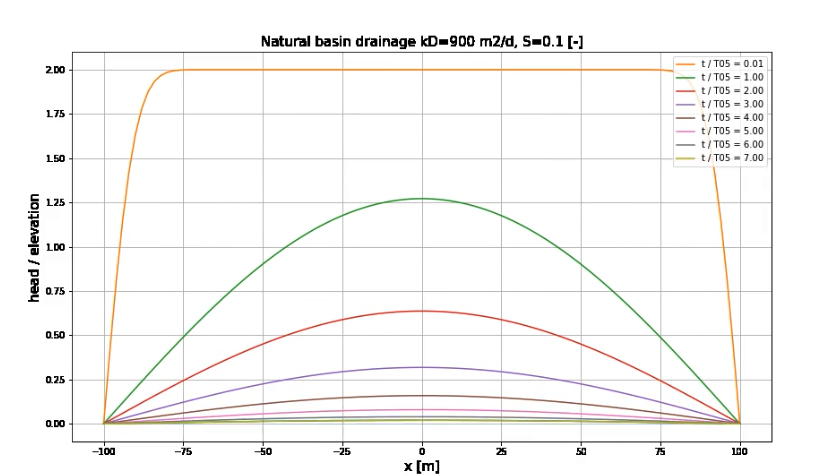
</div>

In [199]:
def get_ti(ti_seq):
    """Generate values for times at which to plot a line."""
    for ti in ti_seq:
        yield ti

# Parameters
b, kD, S, A = 100, 900, 0.1, 2
T = b ** 2 * S / kD # Characteristic time
T05 = (2 / np.pi) ** 2 * np.log(2) * T  # Half time exact

ti_seq = np.hstack((0.01, np.arange(1, 11))) * T05
times  = np.hstack((0.01, np.linspace(0, 7, 71)[1:])) * T05

x = np.linspace(-b, b, 101)

def hxt(t, n=20):
    """Return the head at time t."""
    h = np.zeros_like(x)
    for j in range(1, n + 1):
        j2m1 = (2 * j - 1) * np.pi / 2
        h += (-1) ** (j-1) / j2m1 * np.cos(j2m1 * x / b) * np.exp(- j2m1 ** 2 * t / T)
    return h * 2 * A


ax = newfig("Natural basin drainage kD={} m2/d, S={} [-]".format(kD, S), "x [m]", "head / elevation",
           ylim=(-0.1, A + 0.1))

line, = ax.plot(x, x * 0) # dummy line

ti_generator = get_ti(ti_seq)
ti = next(ti_generator) # Get first ti from generator

def init_func():
    line.set_data([],[])
    return [line]

print('Check that t and ti match when line remains visible during the anaimaton.')

def animate(t):
    global ti
    if t >= ti:
        print("t = {:5.2f}, ti={:5.2f}".format(t / T05, ti / T05))
        ax.plot(x, hxt(ti), label='t / T05 = {:.2f}'.format(ti  / T05))
        ax.legend(loc="upper right")
        ti = next(ti_generator)
    line.set_data(x, hxt(t))
    return [line]

anim = FuncAnimation(plt.gcf(), animate, init_func=init_func,
                                   frames=times, 
                                   fargs=(),
                                   interval=100, blit=True, repeat=False)


if True: # Only show it on screen
    plt.close(anim._fig)
    out = HTML(anim.to_html5_video())
    display(out)
else: # save animation as .mp4 and as a repeacing .gif
    file1 = "NaturalBasinDrainage.mp4"
    file2 = "NaturalBasinDrainage.gif"
        
    anim.save(file1, fps=15, extra_args=['-vcodec', 'libx264'], bitrate=1000)
    print(anim.save_count, " frames saved.")

    !ffmpeg -i $file1 -y $file2
    os.getcwd()
    


Check that t and ti match when line remains visible during the anaimaton.
t =  0.01, ti= 0.01
t =  1.00, ti= 1.00
t =  2.00, ti= 2.00
t =  3.00, ti= 3.00
t =  4.00, ti= 4.00
t =  5.00, ti= 5.00
t =  6.00, ti= 6.00
t =  7.00, ti= 7.00
